In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = True
np.random.seed(555)

### Null Hypothesis and p-value

`Null Hypothesis (H₀)`: default assumption that we are trying to test against.
`p-value`: if the null hypothesis were true, how likely would I see the data like this?

Significant threshold for p-value is 0.05

`p-value < 0.05`: reject the null hypothesis\
`p-value > 0.05`: fail to reject null hypothesis

<br>

### Statistical Tests

- Augmented Dickey Fuller Test
- KPSS Test
- Ljung-box Test

<br>

1. ADF Test
    - Null Hypothesis: The Series is non-stationary. (Has Unit Root)
    - What I want: p-value < 0.05 (<mark>reject the null</mark>) = Series is Stationary
    - `Logic: The Series is non-stationary until proven otherwise`

2. KPSS Test
    - Null Hypothesis: The Series is Stationary
    - What I want: p-value > 0.05 (<mark>fail to reject null</mark>)
    - `Logic: The Series is stationary until proven otherwise`

3. Ljung-box Test
    - Null Hypothesis: Residuals have no-autocorrelation (are white-noise | random)
    - What I want: p-value > 0.05 (<mark>fail to reject null<
    - `Logic: Residuals are random until proven otherwise`

In [70]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

In [71]:
stationary_series = np.random.randn(200)
non_stationary_series = np.cumsum(np.random.randn(200))

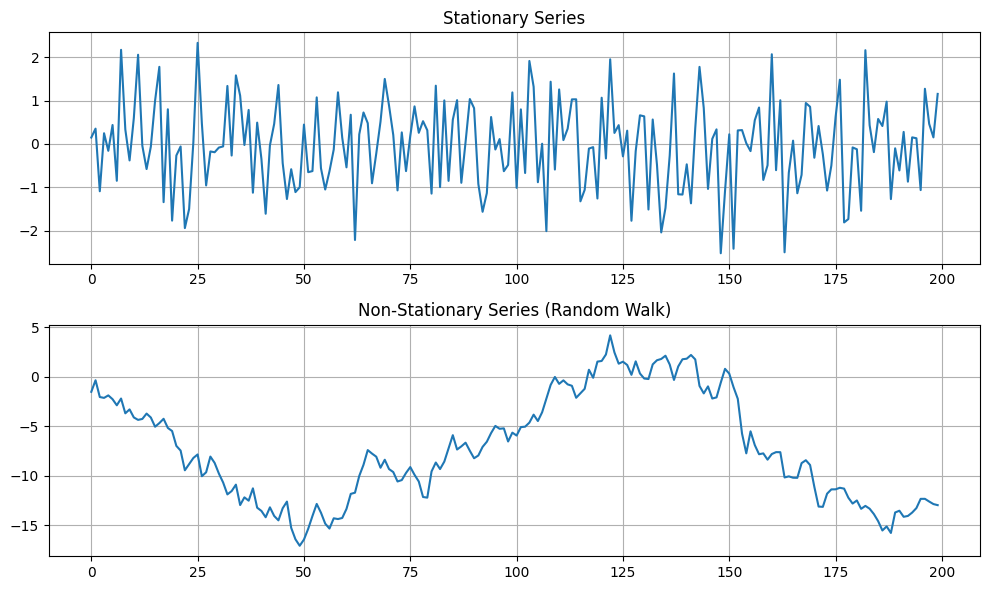

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
axes[0].plot(stationary_series)
axes[0].set_title('Stationary Series')
axes[1].plot(non_stationary_series)
axes[1].set_title('Non-Stationary Series (Random Walk)')
plt.tight_layout()
plt.show()

<pre>
Returns
-------
adf : float
    The test statistic.
pvalue : float
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
usedlag : int
    The number of lags used.
nobs : int
    The number of observations used for the ADF regression and calculation
    of the critical values.
critical values : dict
    Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. Based on MacKinnon (2010).
icbest : float
    The maximized information criterion if autolag is not None.
resstore : ResultStore, optional
    A dummy class with results attached as attributes.
</pre>

In [73]:
adf_result = adfuller(stationary_series)
adf_result

(np.float64(-14.73723708704362),
 np.float64(2.603996890595333e-27),
 0,
 199,
 {'1%': np.float64(-3.4636447617687436),
  '5%': np.float64(-2.8761761179270766),
  '10%': np.float64(-2.57457158581854)},
 np.float64(526.3063852477196))

> ADF Logic: The Series is non-stationary until proven otherwise

In [74]:
if adf_result[1] < 0.05:
    print(f'Null Hypothesis of non-stationary is rejected -> series is stationary')

Null Hypothesis of non-stationary is rejected -> series is stationary


<pre>
Returns
-------
kpss_stat : float
    The KPSS test statistic.
p_value : float
    The p-value of the test. The p-value is interpolated from
    Table 1 in Kwiatkowski et al. (1992), and a boundary point
    is returned if the test statistic is outside the table of
    critical values, that is, if the p-value is outside the
    interval (0.01, 0.1).
lags : int
    The truncation lag parameter.
crit : dict
    The critical values at 10%, 5%, 2.5% and 1%. Based on
    Kwiatkowski et al. (1992).
resstore : (optional) instance of ResultStore
    An instance of a dummy class with results attached as attributes.
</pre>

In [75]:
kpss_result = kpss(stationary_series)
kpss_result

/var/folders/d7/5xjp058538n1_2xf1mtj_bwr0000gn/T/ipykernel_97365/4121313685.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(stationary_series)


(np.float64(0.14115386423440332),
 np.float64(0.1),
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

> KPSS Logic: The Series is stationary until proven otherwise

In [76]:
if kpss_result[1] < 0.05:
    print(f'Null Hypothesis of Stationary is rejected -> series is non-stationary')

In [77]:
adf_result = adfuller(non_stationary_series)
adf_result

(np.float64(-1.5827860160578173),
 np.float64(0.49223463990771116),
 1,
 198,
 {'1%': np.float64(-3.4638151713286316),
  '5%': np.float64(-2.876250632135043),
  '10%': np.float64(-2.574611347821651)},
 np.float64(540.6432907223868))

In [78]:
kpss_result = kpss(non_stationary_series)
kpss_result

/var/folders/d7/5xjp058538n1_2xf1mtj_bwr0000gn/T/ipykernel_97365/4223281533.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(non_stationary_series)


(np.float64(0.28291087102425805),
 np.float64(0.1),
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [79]:
if adf_result[1] > 0.05:
    print(f'Null Hypothesis of non-stationary is failed to rejected -> series is non-stationary')

Null Hypothesis of non-stationary is failed to rejected -> series is non-stationary


In [80]:
if kpss_result[1] > 0.05:
    print(f'Null Hypothesis of Stationary is failed to rejected -> series is stationary')

Null Hypothesis of Stationary is failed to rejected -> series is stationary


!!! Even though we clear see that the data is non-stationary (this is how we generated)\
kpss result is not true at all. That's why we need to use both tests.

<br>

### Residuals

In [81]:
good_residuals = np.random.randn(150)
bad_residuals = np.sin(np.linspace(0, 10, 150)) + np.random.randn(150) * 0.1

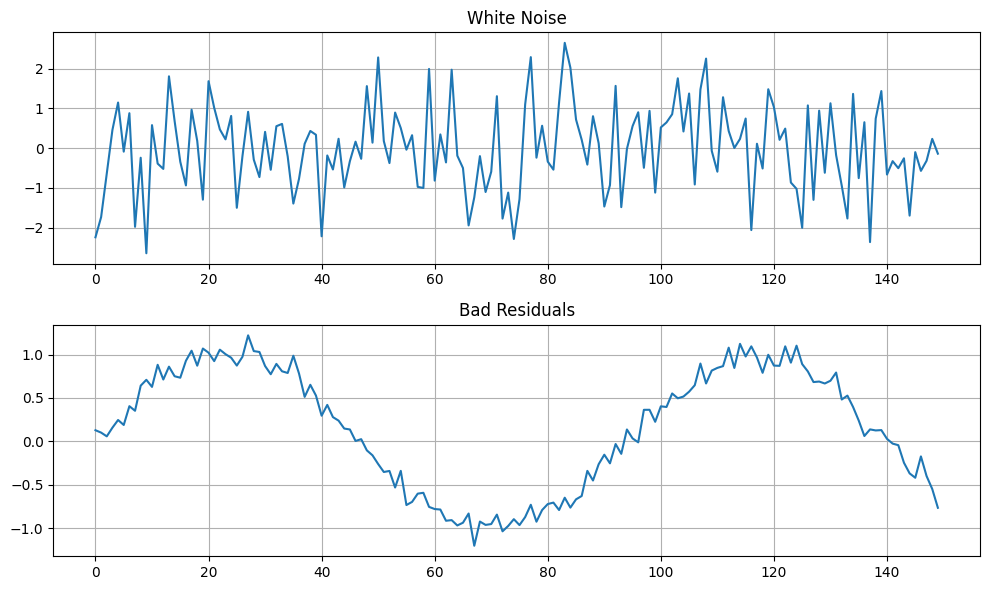

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
axes[0].plot(good_residuals)
axes[0].set_title('White Noise')
axes[1].plot(bad_residuals)
axes[1].set_title('Bad Residuals')
plt.tight_layout()
plt.show()

In [83]:
lb_result_good = acorr_ljungbox(good_residuals, lags=[10], return_df=True)
lb_result_good

,lb_stat,lb_pvalue
10,8.519511,0.578227


Ljung-box Logic: Residuals are random until proven otherwise

In [84]:
if lb_result_good['lb_pvalue'].values[0] > 0.05:
    print('Null hypothesis of random residuals are failed to reject -> they are white noise')

Null hypothesis of random residuals are failed to reject -> they are white noise


In [85]:
lb_result_bad = acorr_ljungbox(bad_residuals, lags=[10], return_df=True)
lb_result_bad

,lb_stat,lb_pvalue
10,1207.492689,3.486447e-253


In [86]:
if lb_result_bad['lb_pvalue'].values[0] < 0.05:
    print('Null hypothesis of random residuals are rejected -> they still have pattern')

Null hypothesis of random residuals are rejected -> they still have pattern
